In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [146]:
train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [147]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

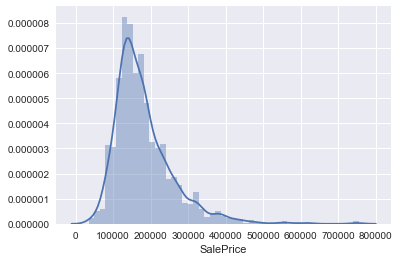

In [148]:
# Histogram
sns.distplot(train['SalePrice'])
# Deviate from the normal distribution
# Have appreciable positive skewness

In [149]:
# Skewness and kurtosis
print("Skewness:", train['SalePrice'].skew())
print("Kurtosis:", train['SalePrice'].kurt())

Skewness: 1.88287575977
Kurtosis: 6.53628186006


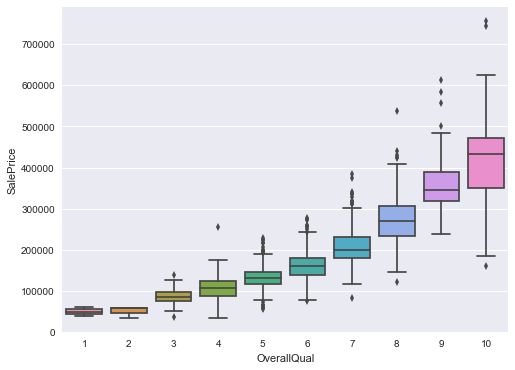

In [150]:
# Box plot between OverallQual and SalePrice
plt.subplots(figsize=(8, 6))
sns.boxplot(x='OverallQual', y="SalePrice", data=
            pd.concat([train['OverallQual'], train['SalePrice']], axis=1))

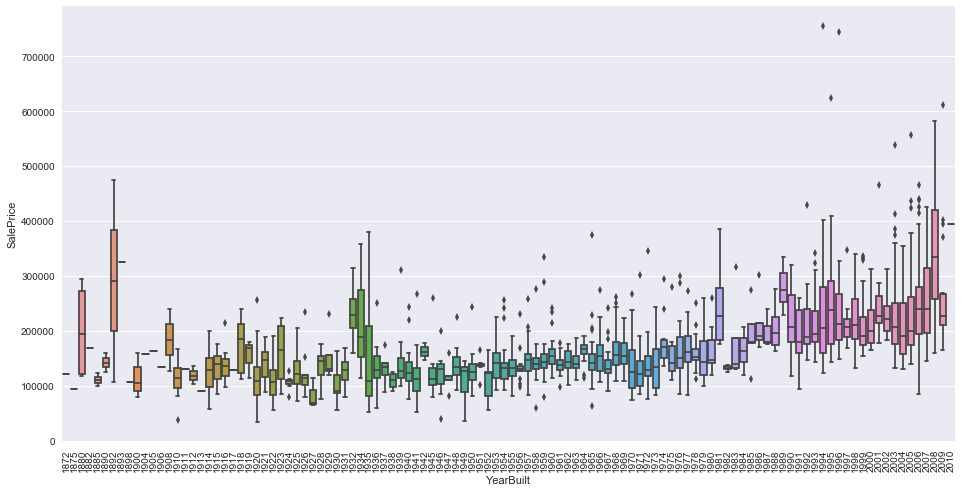

In [151]:
# Box plot between YearBuilt and SalePrice
plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(x='YearBuilt', y="SalePrice", data=
            pd.concat([train['YearBuilt'], train['SalePrice']], axis=1))

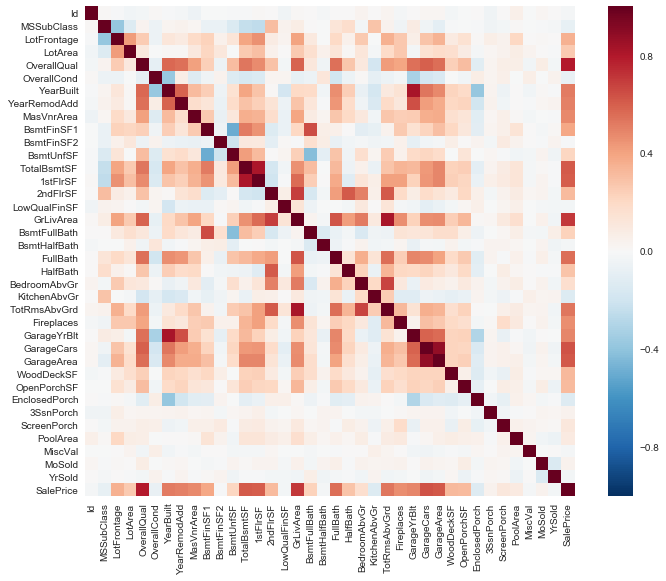

In [152]:
# Plot correlation matrix
plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), square=True)

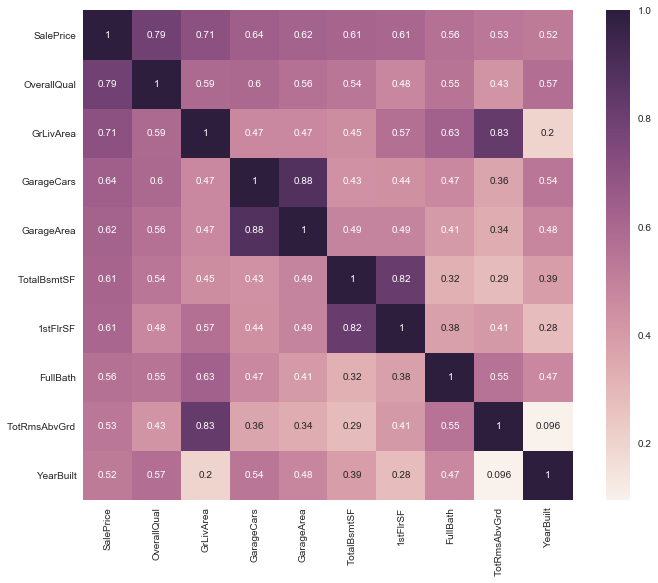

In [153]:
# Saleprice correlation matrix
plt.subplots(figsize=(12, 9))
cols = train.corr().nlargest(10, 'SalePrice').index
sns.heatmap(train[cols].corr(), annot=True, square=True)

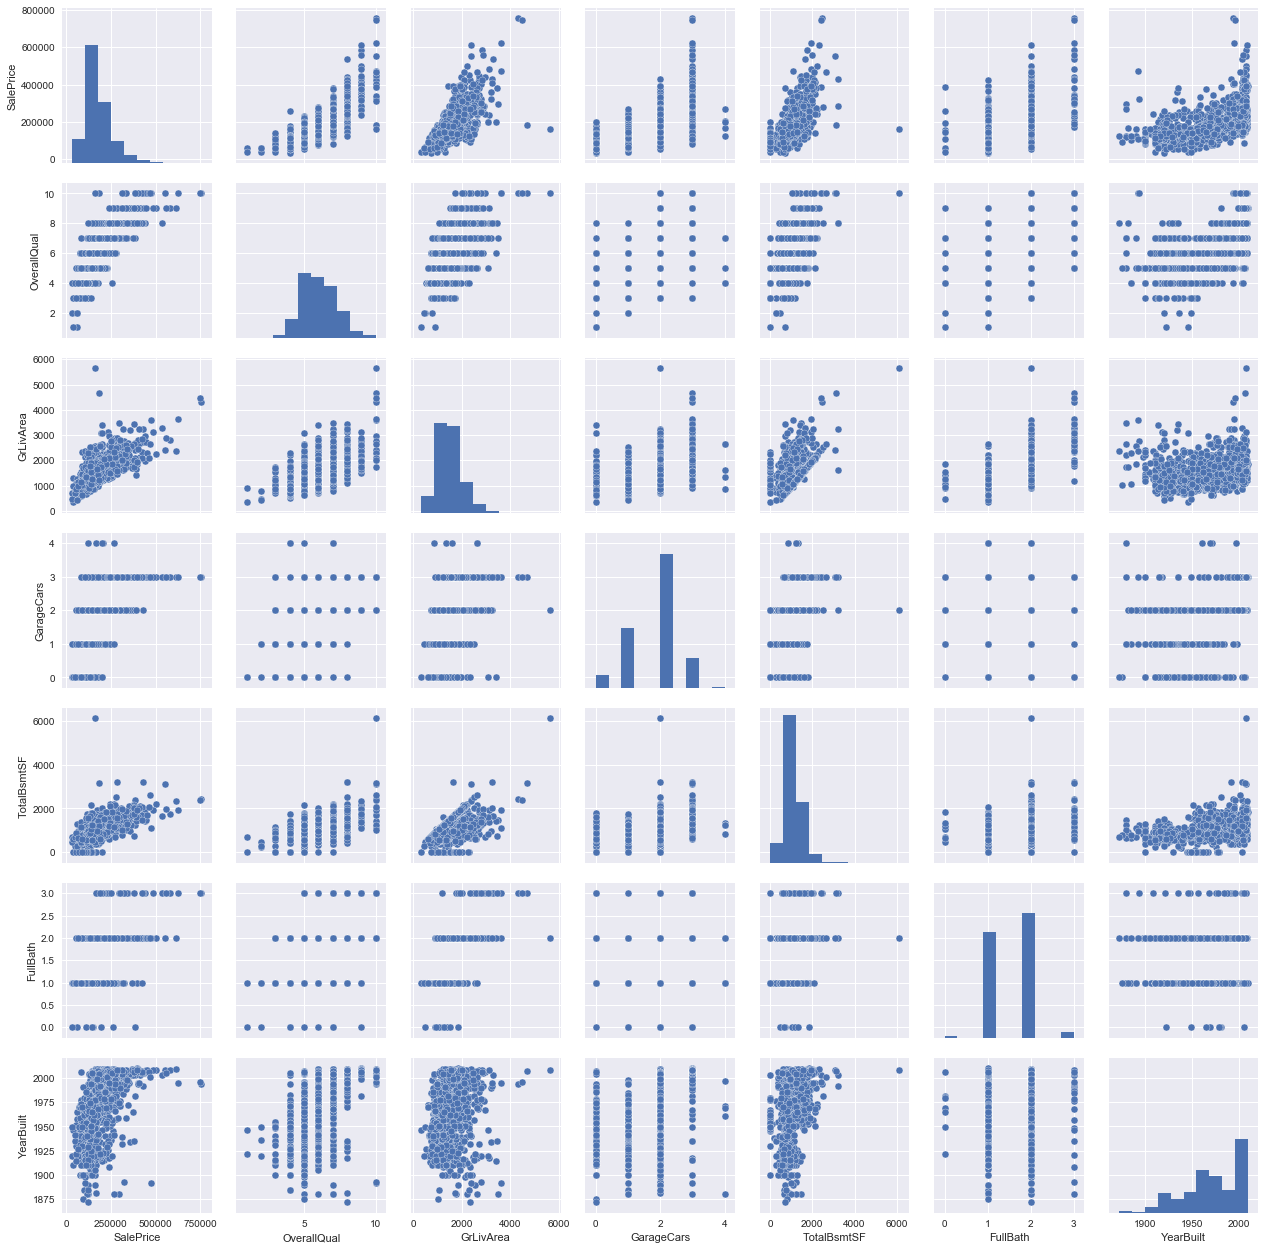

In [154]:
# Scatter plot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

In [155]:
# Analyze missing data
total = train.isnull().sum().sort_values(ascending=False)
total = total[total > 0]
missing_data = pd.concat([total, total / train.shape[0]], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [156]:
# Dealing with missing data
train = train.drop(missing_data.drop(['Electrical']).index, axis=1)\
             .drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().sum()

0

In [157]:
# Standardize and sort data
saleprice_scaled = np.sort(StandardScaler().fit_transform(train['SalePrice']))
print(saleprice_scaled[:10])
print(saleprice_scaled[-10:])

[-1.83820775 -1.83303414 -1.80044422 -1.78282123 -1.77400974 -1.62295562
 -1.6166617  -1.58519209 -1.58519209 -1.57269236]
[ 3.82758058  4.0395221   4.49473628  4.70872962  4.728631    5.06034585
  5.42191907  5.58987866  7.10041987  7.22629831]


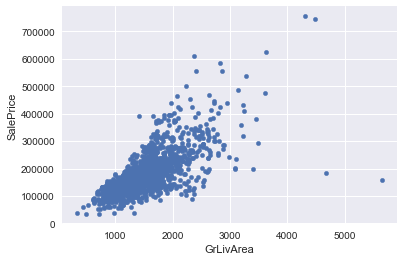

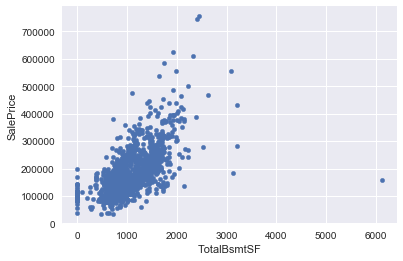

In [158]:
# Scatter plot
pd.concat([train['GrLivArea'], train['SalePrice']], axis=1)\
    .plot.scatter(x='GrLivArea', y='SalePrice')
plt.figure()
pd.concat([train['TotalBsmtSF'], train['SalePrice']], axis=1)\
    .plot.scatter(x='TotalBsmtSF', y='SalePrice')

In [159]:
# Drop outliers
train = train.drop(train.sort_values(by = 'GrLivArea')[-2:].index)

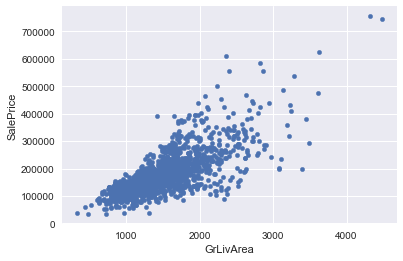

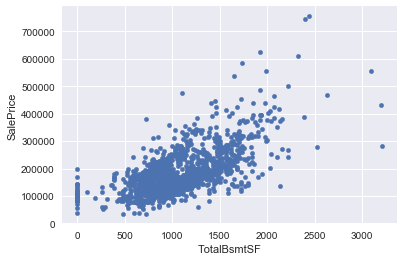

In [160]:
# Scatter plot again
pd.concat([train['GrLivArea'], train['SalePrice']], axis=1)\
    .plot.scatter(x='GrLivArea', y='SalePrice')
plt.figure()
pd.concat([train['TotalBsmtSF'], train['SalePrice']], axis=1)\
    .plot.scatter(x='TotalBsmtSF', y='SalePrice')

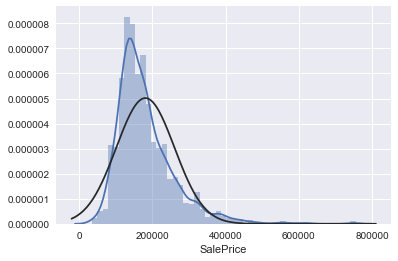

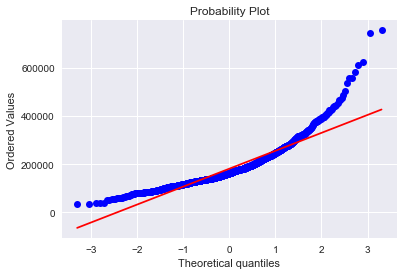

In [161]:
# Histogram
sns.distplot(train['SalePrice'], fit=norm)

# Normal probability plot
# Data distribution should closely follow the diagonal
plt.figure()
temp = stats.probplot(train['SalePrice'], plot=plt)

In [162]:
# Applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

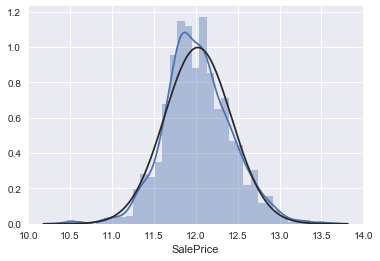

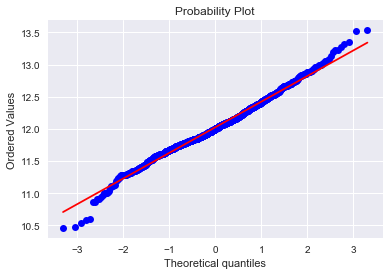

In [163]:
# Transformed histogram
sns.distplot(train['SalePrice'], fit=norm)

# Transformed normal probability plot
# Data distribution should closely follow the diagonal
plt.figure()
temp = stats.probplot(train['SalePrice'], plot=plt)

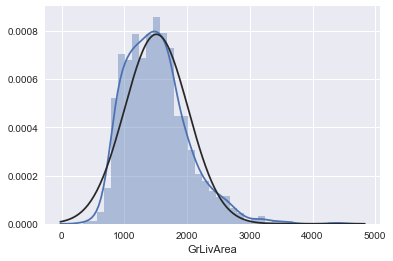

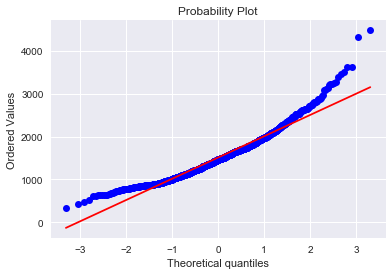

In [164]:
# Histogram GrLivArea
sns.distplot(train['GrLivArea'], fit=norm)

# Normal probability plot GrLivArea
# Data distribution should closely follow the diagonal
plt.figure()
temp = stats.probplot(train['GrLivArea'], plot=plt)

In [165]:
# Applying log transformation GrLivArea
train['GrLivArea'] = np.log(train['GrLivArea'])

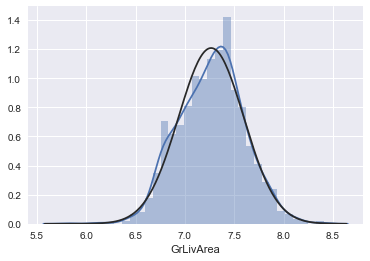

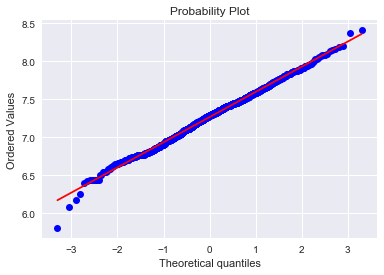

In [166]:
# Transformed histogram GrLivArea
sns.distplot(train['GrLivArea'], fit=norm)

# Transformed normal probability plot GrLivArea
# Data distribution should closely follow the diagonal
plt.figure()
temp = stats.probplot(train['GrLivArea'], plot=plt)

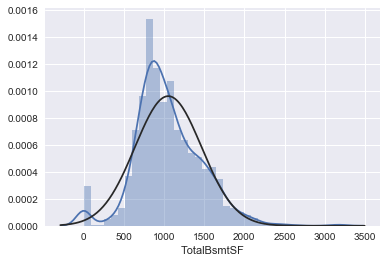

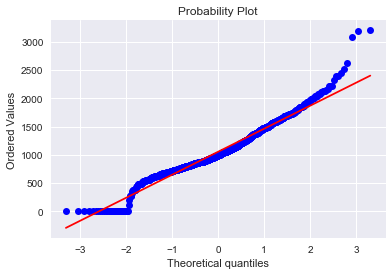

In [167]:
# Histogram TotalBsmtSF
sns.distplot(train['TotalBsmtSF'], fit=norm)

# Normal probability plot TotalBsmtSF
# Data distribution should closely follow the diagonal
plt.figure()
temp = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [168]:
# Create column about whether a house has basement and transform data
train['HasBsmt'] = 0
train.loc[train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
train.loc[train['TotalBsmtSF'] > 0, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

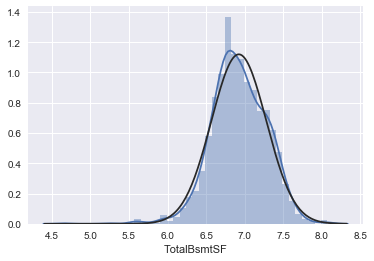

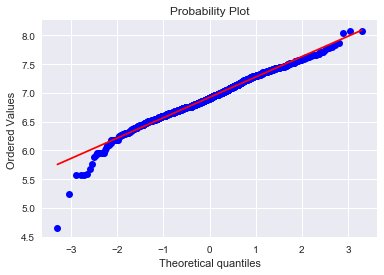

In [169]:
# Histogram TotalBsmtSF
sns.distplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)

# Normal probability plot TotalBsmtSF
# Data distribution should closely follow the diagonal
plt.figure()
temp = stats.probplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

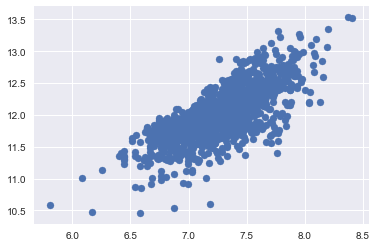

In [170]:
# Scatter plot transformed GrLivArea
plt.scatter(train['GrLivArea'], train['SalePrice'])
# Homoscedasticity problem solved

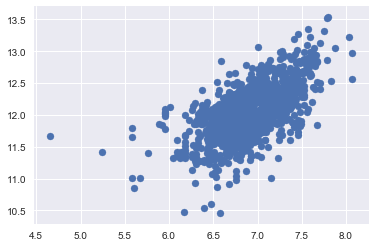

In [171]:
# Scatter plot transformed GrLivArea
plt.scatter(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'], train[train['TotalBsmtSF'] > 0]['SalePrice'])

In [172]:
train = pd.get_dummies(train)